In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.tail

<bound method NDFrame.tail of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

In [5]:
data.shape

(768, 9)

In [6]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
data.BMI.values

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1,  0. , 19.4, 24.2, 24.4, 33.7, 34.7,
       23. , 37.7, 46.8, 40.5, 41.5,  0. , 32.9, 25. , 25.4, 32.8, 29. ,
       32.5, 42.7, 19.6, 28.9, 32.9, 28.6, 43.4, 35.1, 32. , 24.7, 32.6,
       37.7, 43.2, 25. , 22.4,  0. , 29.3, 24.6, 48.8, 32.4, 36.6, 38.5,
       37.1, 26.5, 19.1, 32. , 46.7, 23.8, 24.7, 33.9, 31.6, 20.4, 28.7,
       49.7, 39. , 26.1, 22.5, 26.6, 39.6, 28.7, 22.4, 29.5, 34.3, 37.4,
       33.3, 34. , 31.2, 34. , 30.5, 31.2, 34. , 33.7, 28.2, 23.2, 53.2,
       34.2, 33.6, 26.8, 33.3, 55. , 42.9, 33.3, 34.5, 27.9, 29.7, 33.3,
       34.5, 38.3, 21.1, 33.8, 30.8, 28.7, 31.2, 36.9, 21.1, 39.5, 32.5,
       32.4, 32.8,  0. , 32.8, 30.5, 33.7, 27.3, 37

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
import numpy as np
from scipy import stats
data_zscore = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]

In [10]:
import pandas as pd
def remove_outliers(data,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = data[col].mean()
        sd = data[col].std()
        
        data = data[(data[col] <= mean+(n_std*sd))]
    
    return data

In [11]:
columns = data.columns
n_std = 4
data_no_outliers = remove_outliers(data_zscore, columns, n_std)

Working on column: Pregnancies
Working on column: Glucose
Working on column: BloodPressure
Working on column: SkinThickness
Working on column: Insulin
Working on column: BMI
Working on column: DiabetesPedigreeFunction
Working on column: Age
Working on column: Outcome


In [12]:
data_no_outliers.shape

(687, 9)

In [13]:
## calculate z_score
data_zscore = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]

<Axes: xlabel='Glucose'>

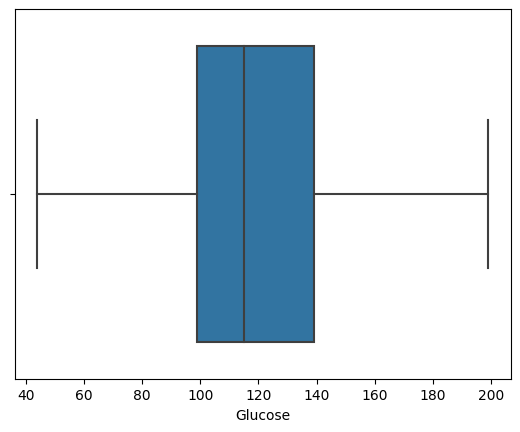

In [14]:
sns.boxplot(x = "Glucose" , data = data_no_outliers)

<Axes: xlabel='BloodPressure', ylabel='Density'>

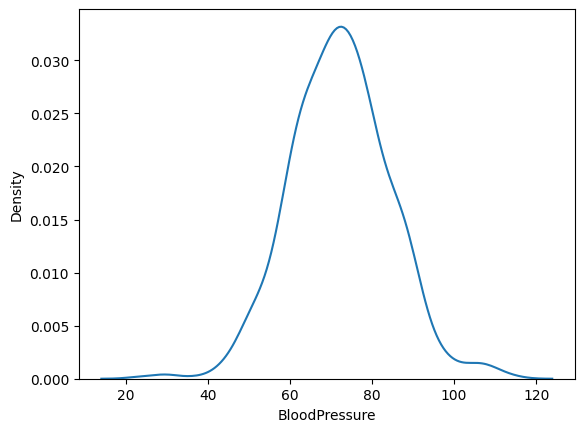

In [15]:
sns.kdeplot(x = "BloodPressure" , data = data_no_outliers)

In [16]:
x=data_no_outliers.drop("Outcome" , axis = 1)
y=data_no_outliers["Outcome"]

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [19]:
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(x_train,y_train)
y_pred_en = clf_en.predict(x_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

print(confusion_matrix(y_test,y_pred_en))
print(classification_report(y_test,y_pred_en))
print(accuracy_score(y_test,y_pred_en))

[[81  9]
 [27 21]]
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        90
           1       0.70      0.44      0.54        48

    accuracy                           0.74       138
   macro avg       0.72      0.67      0.68       138
weighted avg       0.73      0.74      0.72       138

0.7391304347826086


In [21]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred_en))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred_en))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_en)))

Mean Absolute Error: 0.2608695652173913
Mean Squared Error: 0.2608695652173913
Root Mean Squared Error: 0.5107539184552492


[Text(0.5, 0.875, 'x[1] <= 0.837\nentropy = 0.911\nsamples = 549\nvalue = [370, 179]'),
 Text(0.25, 0.625, 'x[5] <= -0.929\nentropy = 0.772\nsamples = 437\nvalue = [338, 99]'),
 Text(0.125, 0.375, 'x[6] <= 0.76\nentropy = 0.085\nsamples = 94\nvalue = [93, 1]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 78\nvalue = [78, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.337\nsamples = 16\nvalue = [15, 1]'),
 Text(0.375, 0.375, 'x[1] <= -0.651\nentropy = 0.863\nsamples = 343\nvalue = [245, 98]'),
 Text(0.3125, 0.125, 'entropy = 0.509\nsamples = 115\nvalue = [102, 13]'),
 Text(0.4375, 0.125, 'entropy = 0.953\nsamples = 228\nvalue = [143, 85]'),
 Text(0.75, 0.625, 'x[5] <= -0.366\nentropy = 0.863\nsamples = 112\nvalue = [32, 80]'),
 Text(0.625, 0.375, 'x[7] <= -0.659\nentropy = 0.999\nsamples = 29\nvalue = [15, 14]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.6875, 0.125, 'entropy = 0.99\nsamples = 25\nvalue = [11, 14]'),
 Text(0.875, 0.375, 'x[1] <= 1.192\nentr

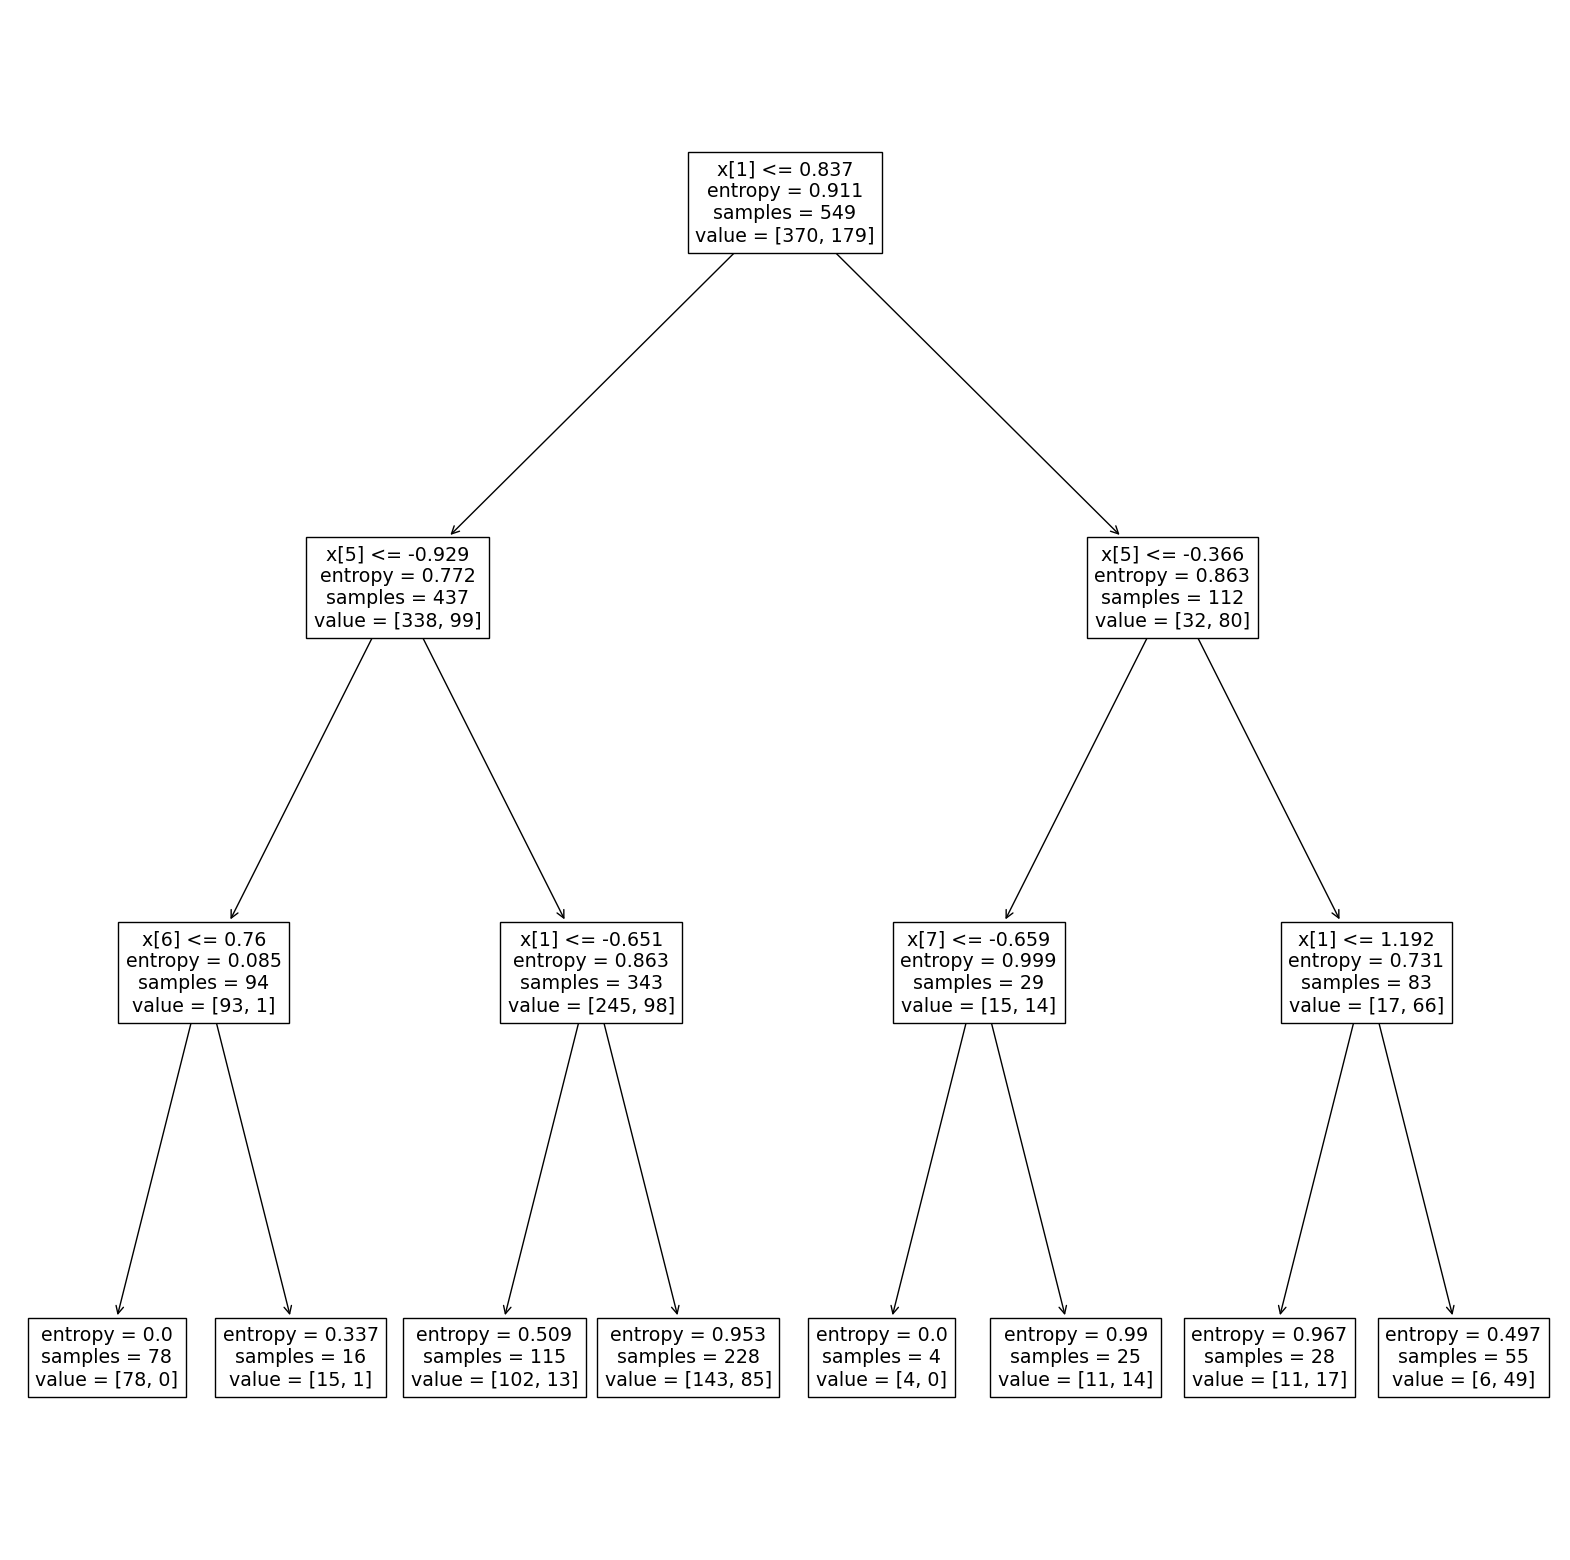

In [22]:
plt.figure(figsize=(20,20))
from sklearn import tree
tree.plot_tree(clf_en.fit(x_train, y_train))